In [1]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
import re

DAY 11 - Mar 7, 2017

Today I'll do something a little different. This morning I tweeted something along the lines of "will be working with `matplotlib`." In terms of visualization, I'm more familiar with R and ggplot2 and so this is a perfect opportunity to explore matplotlib. But first I need data.

### Acquiring the data

What data to choose? At the time, my younger brother had League of Legends on his computer screen. Inspiration. I'll use League of Legend data. Plotting game data is always fun. My brother said use the [League of Legends: Base champion statistics](http://leagueoflegends.wikia.com/wiki/Base_champion_statistics) website.

In [2]:
website_base_stats = "http://leagueoflegends.wikia.com/wiki/Base_champion_statistics"

In [3]:
# Save HTML to soup
html_data = requests.get(website_base_stats).text
soup = BeautifulSoup(html_data, "html5lib")

In [4]:
# Parse table
table = soup.find('table', attrs={'class' : 'wikitable'})

# Parse table header
lol_thead = [h.text.strip() for h in soup.find_all("th")]

# Parse table body
table_body = table.tbody

data = []
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    if len(cols) == 0: continue
    cols[0] = cols[0].span
    cols = [c.text.strip() for c in cols]
    data.append(cols)

lol_table = pd.DataFrame(data, columns=lol_thead)

# Print
print(lol_table.shape)
lol_table.head()

(134, 19)


,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range
0,Aatrox,537.8,+85,6.59,+0.5,105,+45,0,+0,60.376,+3.2,0.651,+3%,24.384,+3.8,32.1,+1.25,345,150
1,Ahri,514.4,+80,6.505,+0.6,334,+50,6,+0.8,53.04,+3,0.668,+2%,20.88,+3.5,30,+0,330,550
2,Akali,587.8,+85,8.34,+0.65,200,+0,50,+0,58.376,+3.2,0.694,+3.1%,26.38,+3.5,32.1,+1.25,350,125
3,Alistar,613.36,+106,8.675,+0.85,278.84,+38,8.5,+0.8,61.1116,+3.62,0.625,+2.125%,24.38,+3.5,32.1,+1.25,330,125
4,Amumu,613.12,+84,8.875,+0.85,287.2,+40,7.38,+0.525,53.384,+3.8,0.638,+2.18%,23.544,+3.8,32.1,+1.25,335,125


In [5]:
# Parse href link info to url with more info
lol_links = table.tbody.find_all("a", href=True, class_=False)

link_data = []
for l in lol_links:
    link_data.append(l.attrs)


link_data = pd.DataFrame(link_data)
link_data = link_data.rename(columns={"title": "Champions"})

# Use full link
link_data.href = "http://leagueoflegends.wikia.com" + link_data.href

link_data.tail()

,href,Champions
140,http://leagueoflegends.wikia.com/wiki/Zac,Zac
141,http://leagueoflegends.wikia.com/wiki/Zed,Zed
142,http://leagueoflegends.wikia.com/wiki/Ziggs,Ziggs
143,http://leagueoflegends.wikia.com/wiki/Zilean,Zilean
144,http://leagueoflegends.wikia.com/wiki/Zyra,Zyra


In [6]:
# Join tables
lol_table = pd.merge(lol_table, link_data, on="Champions", how="left")


print(lol_table.shape)
lol_table.head()

(134, 20)


,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range,href
0,Aatrox,537.8,+85,6.59,+0.5,105,+45,0,+0,60.376,+3.2,0.651,+3%,24.384,+3.8,32.1,+1.25,345,150,http://leagueoflegends.wikia.com/wiki/Aatrox
1,Ahri,514.4,+80,6.505,+0.6,334,+50,6,+0.8,53.04,+3,0.668,+2%,20.88,+3.5,30,+0,330,550,http://leagueoflegends.wikia.com/wiki/Ahri
2,Akali,587.8,+85,8.34,+0.65,200,+0,50,+0,58.376,+3.2,0.694,+3.1%,26.38,+3.5,32.1,+1.25,350,125,http://leagueoflegends.wikia.com/wiki/Akali
3,Alistar,613.36,+106,8.675,+0.85,278.84,+38,8.5,+0.8,61.1116,+3.62,0.625,+2.125%,24.38,+3.5,32.1,+1.25,330,125,http://leagueoflegends.wikia.com/wiki/Alistar
4,Amumu,613.12,+84,8.875,+0.85,287.2,+40,7.38,+0.525,53.384,+3.8,0.638,+2.18%,23.544,+3.8,32.1,+1.25,335,125,http://leagueoflegends.wikia.com/wiki/Amumu


In [7]:
lol_table.to_csv("/Users/csiu/Desktop/test.txt", index=False, sep="\t")

We now have data to plot.

### Matplotlib
According to the cheatsheet that Kirk Borne tweeted out this morning. The components are:

#### 1. Prepare the data

In [8]:
# Fix problematic data
print(lol_table[lol_table["Champions"]=="Kled"])

# by replacing with None type
lol_table.iloc[56, 7:9] = None
lol_table[lol_table["Champions"]=="Kled"]

   Champions   HP  HP+ HP5   HP5+   MP MP+             MP5            MP5+  \
56      Kled  340  +70   6  +0.75  100  +0  {{{mp5_base}}}  +{{{mp5_lvl}}}   

    AD AD+     AS    AS+  AR AR+    MR    MR+   MS Range  \
56  55  +3  0.625  +3.5%  26  +4  32.1  +1.25  345   125   

                                          href  
56  http://leagueoflegends.wikia.com/wiki/Kled  


,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range,href
56,Kled,340,+70,6,+0.75,100,+0,None,None,55,+3,0.625,+3.5%,26,+4,32.1,+1.25,345,125,http://leagueoflegends.wikia.com/wiki/Kled


In [9]:
# Convert data types to float
columns_to_float = list(lol_table.columns[1:12])+ list(lol_table.columns[13:-1])
lol_table[columns_to_float] = lol_table[columns_to_float].astype(float)
lol_table

# Convert AS+ data types
lol_table[lol_table.columns[12]] = lol_table[lol_table.columns[12]].map(lambda x: float(x.strip("%"))/100)

#### 2. Create Plot

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,6]

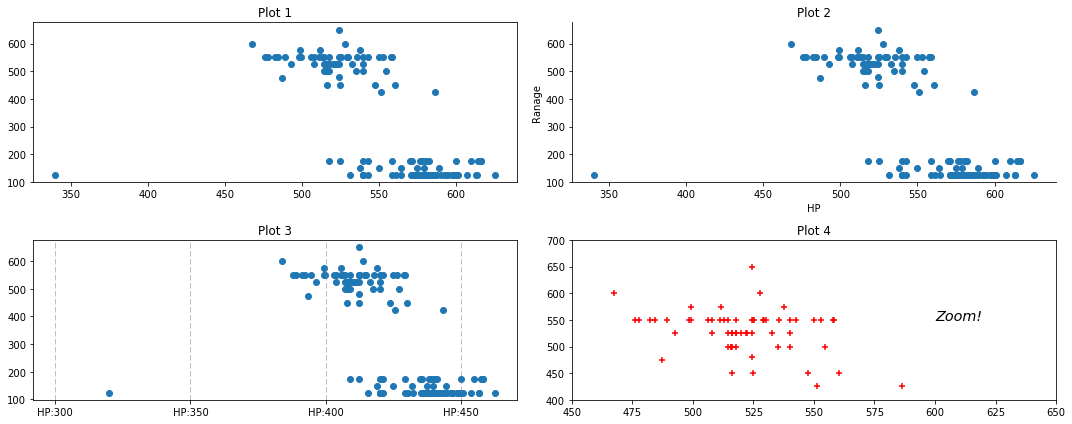

In [51]:
# 2. Create plot
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Add title so know which plot is which
ax1.title.set_text('Plot 1')
ax2.title.set_text('Plot 2')
ax3.title.set_text('Plot 3')
ax4.title.set_text('Plot 4')

# 3. Plotting routines
# Add the data (same data to all plots)
ax1.scatter(x=lol_table.HP, y=lol_table.Range)
ax2.scatter(x=lol_table.HP, y=lol_table.Range)
ax3.scatter(x=lol_table.HP, y=lol_table.Range)
ax4.scatter(x=lol_table.HP, y=lol_table.Range, marker="+", color="red")

# 4. Customize plots
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set(xlabel = "HP", ylabel = "Ranage")

for vline in range(300, 700, 100):
    ax3.axvline(vline, color="grey", linestyle="dashed", linewidth=0.5)
ax3.xaxis.set(
    ticks=range(300, 700, 100),
    ticklabels=["HP:{}".format(x) for x in range(300, 700, 50)]
)

ax4.set(
    xlim=[450, 650],
    ylim=[400, 700]
)
ax4.text(600, 550, "Zoom!", style='italic', fontsize="x-large")
# 5. Save figures
# plt.savefig('foo.png')
# plt.savefig('foo.png', transparent=True)

plt.tight_layout()